In [ ]:
# ===============================
# Organoid Learning Evaluation
# ===============================

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from org_learning_eval.OrgLearningEval import OrgLearningEval  # if using class


In [ ]:
import sys
import os

# Add the parent folder of this notebook to the Python path
module_path = os.path.abspath(os.path.join(''))
if module_path not in sys.path:
    sys.path.append(module_path)


Loaded default dataset: 'Baseline'


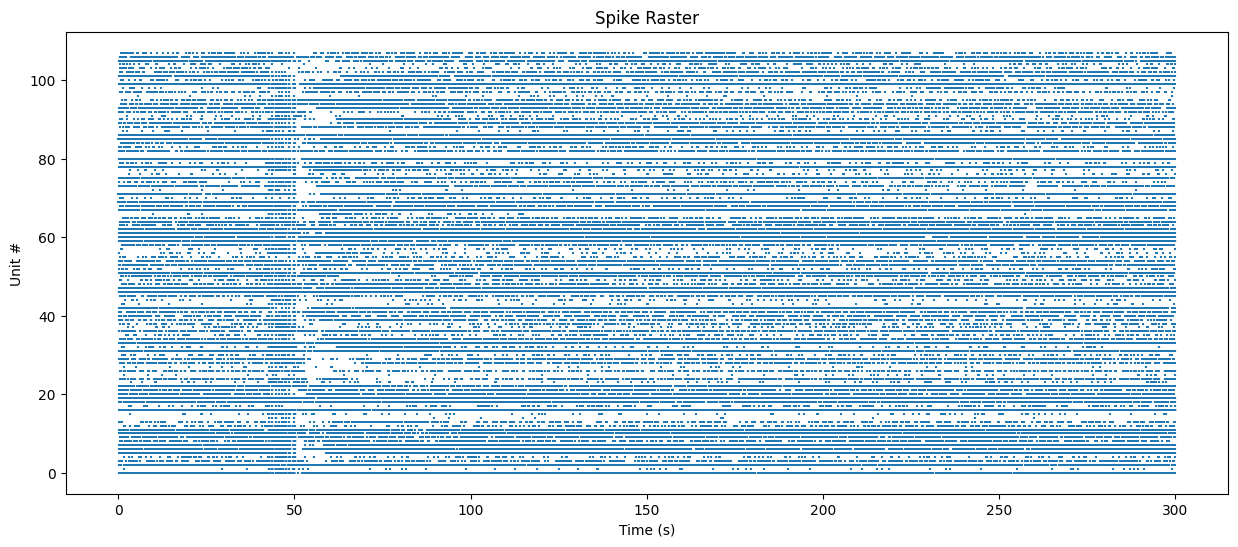

In [1]:
from OrgLearningEval import OrgLearningEval

ole = OrgLearningEval()  # Should load "Baseline" and print confirmation
ole.show_raster()        # Should show a plot if the dataset loaded correctly


In [31]:
# Load Logs
log_paths = {
    "Adaptive": "data/exp1_cartpole_long_6_logs.pkl",
    "Random": "data/exp1_cartpole_long_7_logs.pkl",
    "Null":    "data/exp1_cartpole_long_8_logs.pkl"
}
log_data = {k: pickle.load(open(v, "rb")) for k, v in log_paths.items()}

In [6]:
paths = {
    "Baseline": "data/baseline_spike_data.pkl",
    "Adaptive": "data/exp1_cartpole_long_6_spike_data.pkl",
    "Random":   "data/exp1_cartpole_long_7_spike_data.pkl",
    "None":     "data/exp1_cartpole_long_8_spike_data.pkl"
}

# Check if each file exists
for label, path in paths.items():
    print(f"{label}: {' Found' if os.path.exists(path) else ' MISSING'}")


Baseline:  Found
Adaptive:  Found
Random:  Found
None:  Found


In [7]:
from core.data_loader import load_datasets

datasets = load_datasets(paths)
for key, sd in datasets.items():
    print(f"{key}: loaded type = {type(sd)}")

Baseline: loaded type = <class 'spikedata.spikedata.SpikeData'>
Adaptive: loaded type = <class 'spikedata.spikedata.SpikeData'>
Random: loaded type = <class 'spikedata.spikedata.SpikeData'>
None: loaded type = <class 'spikedata.spikedata.SpikeData'>


Switched to dataset: Adaptive


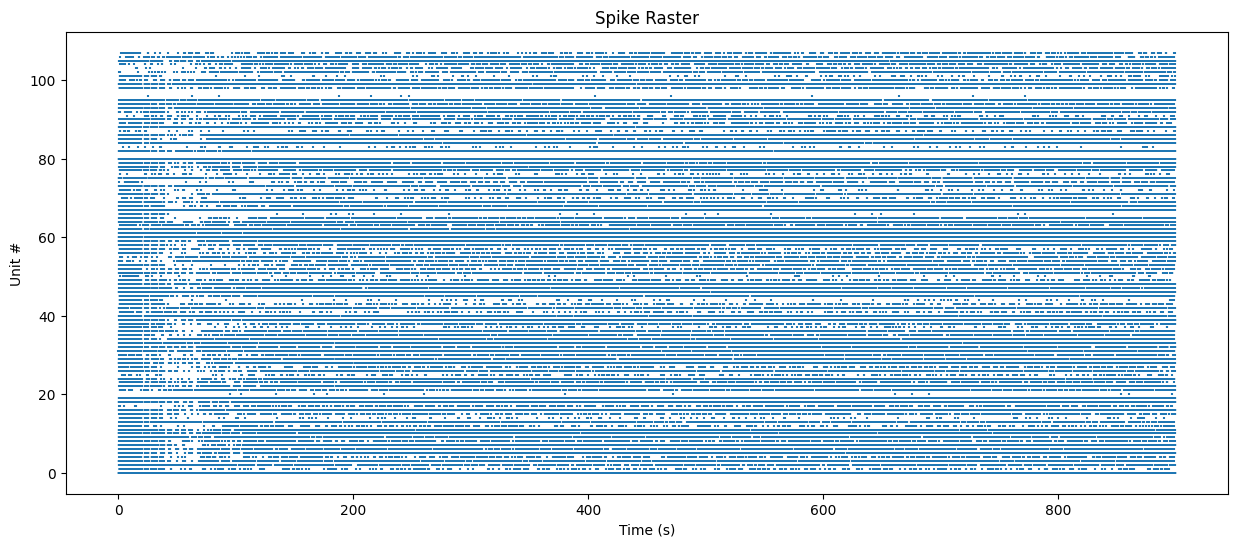

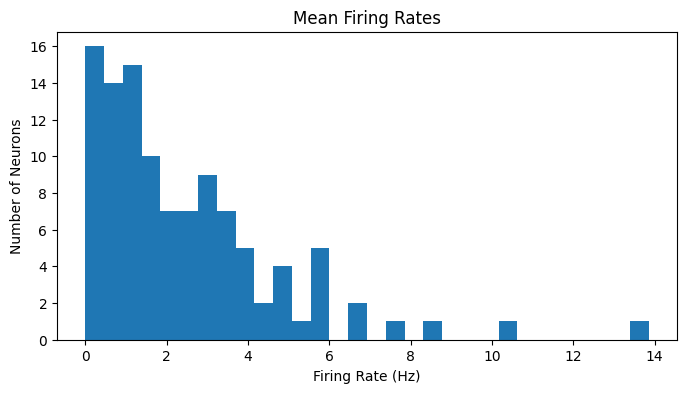

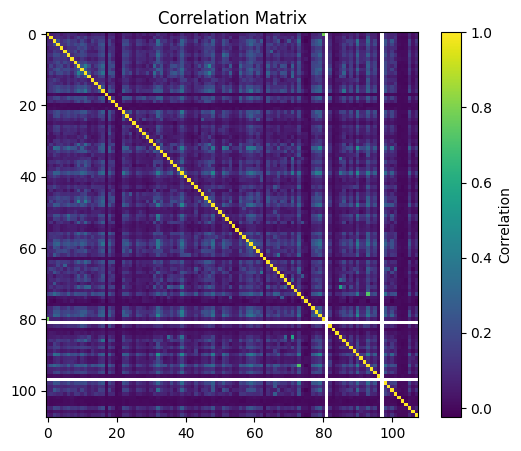

In [10]:
ole.set_dataset("Adaptive")
ole.show_raster()
ole.show_mean_firing_rates()
ole.show_correlation_matrix()


In [17]:
# Inspect structure
print("causal_info keys:", list(causal_info.keys()))
print("metadata keys:", list(metadata.keys()))


causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']


In [27]:
mapping_df = metadata["mapping"]

# Show the first few rows
mapping_df.head()

,channel,electrode,x,y
0,0,18598,2065.0,1470.0
1,1,20644,3220.0,1627.5
2,2,19040,2100.0,1505.0
3,3,21723,2852.5,1715.0
4,4,14939,3482.5,1172.5


In [42]:
print(first_order.shape)  # confirm it's (N, N)


(10, 10)


In [56]:
print("Training electrodes:", metadata["training_electrodes"])
print("Encode electrodes:", metadata["encode_electrodes"])
print("Decode electrodes:", metadata["decode_electrodes"])


Training electrodes: [24768, 22182, 23923, 909, 3229, 17335]
Encode electrodes: [23275, 25039]
Decode electrodes: [18429, 18385]


In [57]:
encode_local = [0, 1]  # or any valid indices from 0 to 9
decode_local = [8, 9]  # also from 0 to 9

In [58]:
first_order = causal_info["first_order_connectivity"]
multi_order = causal_info["multi_order_connectivity"]
burst_percent = causal_info["burst_percent"]

c1_values = [first_order[i, j] for i in encode_local for j in decode_local]
cm_values = [multi_order[i, j] for i in encode_local for j in decode_local]
burst_values = [burst_percent[j] for j in decode_local]

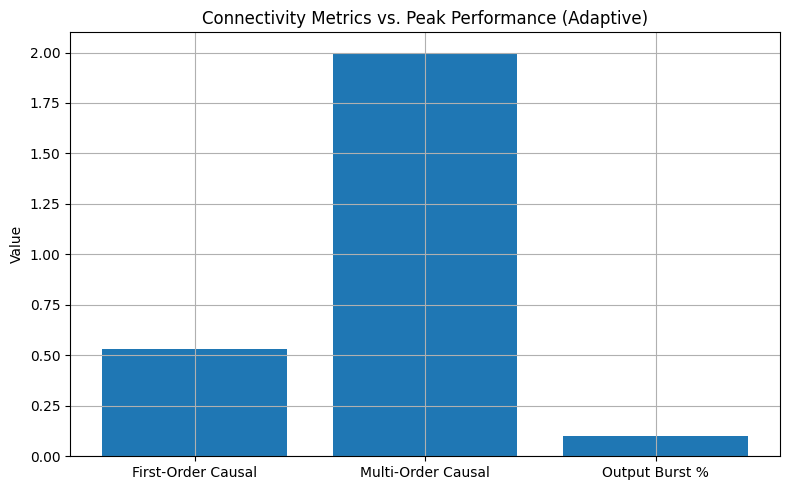

In [59]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
indices = list(range(10))  # 10 training neurons

c1_values = [first_order[i, j] for i in indices for j in indices if i != j]
cm_values = [multi_order[i, j] for i in indices for j in indices if i != j]
burst_values = [burst_percent[j] for j in indices]

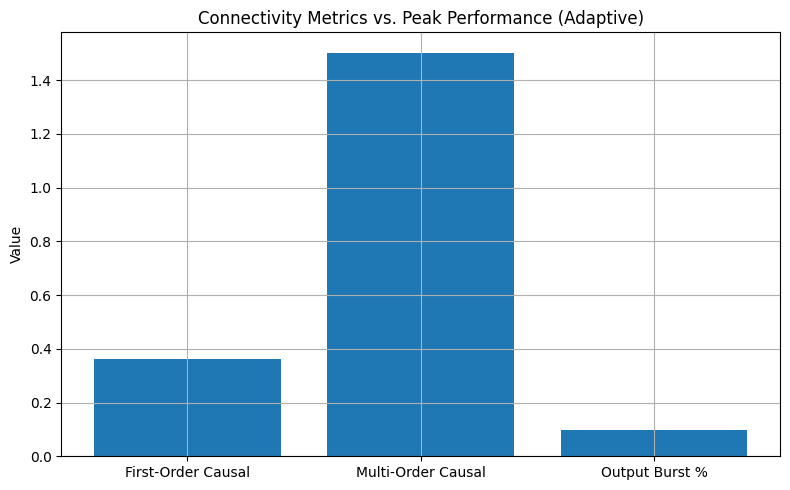

In [61]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()